In [66]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import category_encoders as ce

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

In [90]:
from gensim.models import KeyedVectors
model_dir = '../entity_vector.model.bin'
model = KeyedVectors.load_word2vec_format(model_dir, binary=True)

In [35]:
#読み込み
import_data_pd = pickle.load(open("import_data_pd_max.sav","rb"))

In [68]:
category_df = pd.read_csv("category.csv",encoding="UTF8",sep=",",dtype = object,index_col=0)
category_df

,中分類,category_id,category_od
0,水産・農林業,0050,0
1,鉱業,1050,1
2,建設業,2050,2
3,食料品,3050,3
4,繊維製品,3100,4
5,パルプ・紙,3150,5
6,化学,3200,6
7,医薬品,3250,7
8,石油・石炭製品,3300,8
9,ゴム製品,3350,9


In [69]:
#category_odの作成
oe = ce.OrdinalEncoder(cols="category_id", handle_unknown='ignore')
oe.fit(category_df["category_id"])
import_data_pd_oe = oe.transform(import_data_pd["category_id"])
import_data_pd["category_od"] = import_data_pd_oe["category_id"] - 1
import_data_pd = import_data_pd.drop(import_data_pd[import_data_pd["category_od"].isnull()].index,axis=0)
import_data_pd["category_od"] = import_data_pd["category_od"].astype(int)

In [70]:
import_data_pd

,company,wiki_id,category_id,text,category_od
0,富士通,1314,3650,日本の総合エレクトロニクスメーカーであり、総合ITベンダーである。ITサービス提供企業として...,15
1,シャープ,1531,3650,日本・大阪府堺市に拠点を置く、台湾・鴻海精密工業傘下の電機メーカー。精度=2016-12#沿...,15
2,バンダイ,1811,3800,バンダイナムコグループの玩具、模型、既製服（アパレル）、生活用品等を手がけるメーカー。「変身...,18
3,日本電気,2173,3650,東京都港区芝五丁目に本社を置く住友グループの電機メーカー。当社グループの工場が進出したことを...,15
4,マイクロソフト,2454,5250,アメリカ合衆国ワシントン州に本社を置く、ソフトウェアを開発・販売する会社である。1975年に...,24
5,三越,3393,6100,株式会社三越伊勢丹ホールディングス傘下の株式会社三越伊勢丹が運営する日本の百貨店。また、株式...,26
6,新京成電鉄,3580,5050,千葉県東葛地域に1路線（新京成線）を有する鉄道会社。京成グループの会社（持分法適用関連会社）...,20
7,りそな銀行,3911,7050,本店を大阪府大阪市中央区に置く、りそなホールディングス傘下の都市銀行。国内で唯一、信託部門を...,27
8,スルッとKANSAI,3935,9050,近畿圏を中心とする西日本の公共交通機関のストアードフェアシステム及び周遊券のネットワーク、ま...,32
9,東京臨海高速鉄道,3982,5050,東京都でりんかい線を運営している鉄道会社。東京都が90%以上出資する第三セクター方式で設立さ...,20


In [71]:
import_data_list = import_data_pd["text"].values.tolist()

In [72]:
#読み込み
sentence_list = pickle.load(open("sentence_list.sav","rb"))

In [73]:
sentence_list[455]

'宮崎県 宮崎 本店 中位 地方銀行 宮崎 指定金融機関 本店 宮崎県 県外 鹿児島 鹿児島 店 地盤 大分 熊本 福岡 大阪府 東京 店舗 熊本 支店 東京支店 空中 店舗 平成 個人 特 店舗 みや ぎん 宮崎 当行 日向 中央 銀行 宮崎銀行 銀行 不況 県 形 昭和 日向 興業 銀行 資本金 昭和 宮崎銀行 商号変更 昭和 本店 昭和 オンライン 昭和 福岡 証券取引所 昭和 事務 センター オンラインシステム macs 昭和 東京証券取引所 大阪証券取引所 平成 オンラインシステム 平成 本店 別館 平成 月 じゅう システム 銀行'

In [74]:
docs = np.array(sentence_list)
docs.shape

(11045,)

In [80]:
X = pd.DataFrame(docs)
Y = import_data_pd["category_od"]

In [81]:
N_train = int(len(X.index) * 0.8)
N_test = len(X.index) - N_train

In [82]:
import_data_pd['text'][0]

'日本の総合エレクトロニクスメーカーであり、総合ITベンダーである。ITサービス提供企業として売上高で国内1位、世界4位（2015年）。通信システム、情報処理システムおよび電子デバイスの製造・販売ならびにそれらに関するサービスの提供を行っている。理化学研究所と共同開発したスーパーコンピュータ「京（けい）」が、計算速度のランキングで世界首位を獲得（2011年時点）。また「非接触型 手のひら静脈認証」などの世界初の商品を開発し、第17回 顧客満足度調査（調査：日経コンピュータ）のハードウェア分野において8部門中6部門で首位を獲得するなど高い商品力を誇る。グローバル（世界100ヶ国以上）にビジネスを展開し、約16万人の連結従業員と3246億円を超える資本金を擁し、売上高4兆7000億円を超える大手企業である(2015年時点)。環境保全に積極的であり、世界有数のICT専門誌『Computerworld』の‘グリーンIT ベンダートップ12社’（IT機器における省エネと電力を節約してCO2排出を減少させる技術の利用において最も優れているITベンダーのランキング）で、2年連続で世界首位を獲得（2011年時点）。国内のIT業界・就職人気企業ランキングのメーカー部門で首位、総合部門で第2位にランクインするなど高い人気を誇っている（2011年時点）。また、これまでの人生において何らかの高い実績を上げた人が対象である『Challenge & Innovation採用』（新卒採用）を2010年度に新設した。その採用ではラクロスやアーティスティックスイミングの日本代表選手、俳句や囲碁で学生日本一になった者、また現役で公認会計士試験に合格した者や国際的なビジネスコンテストで優勝を果たした者など、幅広い層の人材を獲得することに成功している。9人制バレーボール男子部は、全国タイトル計35回（歴代最多タイ、都市対抗4回・全日本実業団9回・国体8回・全日本総合8回・桜田記念6回）を誇る強豪と知られる。1923年、古河電気工業とドイツの電機メーカーであるシーメンス社が発電機と電動機を日本で国産化するため合弁会社として富士電機製造株式会社（現・富士電機株式会社）を設立。社名の富士の「富」は古河グループの「ふ」、「士」はシーメンス社（ドイツ語では「ジーメンス」社）の「じ」に由来する。富士通は、富士電機製造

In [83]:
#前処理
#tfidf

In [108]:
expected_value = 0
expected_value_new = 0

vectorizer = TfidfVectorizer(use_idf=True, token_pattern=u'(?u)\\b\\w+\\b',max_features=15000)

drop_columns_list = []


while expected_value <= expected_value_new:
    expected_value = expected_value_new
    
    print(1)
    
    #シャッフルして分割
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=N_test,shuffle = True)
    
    #学習データをベクトル化
    docs_train = np.reshape(X_train.values,(len(X_train.index)))
    docs_train_vec = vectorizer.fit_transform(docs_train)
    
    X_train_vec = pd.DataFrame(docs_train_vec.toarray())
    X_train_vec.columns = vectorizer.get_feature_names()
    
    #不要なカラムを削除
    contain_list = list(set(drop_columns_list) & set(X_train_vec.columns))
    X_train_vec = X_train_vec.drop(contain_list,axis=1)
    
    #モデル作成
    clf = RandomForestClassifier(n_estimators=500)
    
    clf.fit(X_train_vec, Y_train)
    
    #特徴量
    features = X_train_vec.columns
    importances = clf.feature_importances_
    indices = np.argsort(importances)
    
    #テストデータをベクトル化
    docs_test = np.reshape(X_test.values,(len(X_test.index)))
    docs_test_vec = vectorizer.transform(docs_test)
    
    X_test_vec = pd.DataFrame(docs_test_vec.toarray())
    X_test_vec.columns = vectorizer.get_feature_names()
    
    #不要なカラムを削除
    X_test_vec = X_test_vec.drop(contain_list,axis=1)
    
    #精度
    accuracy = clf.score(X_test_vec, Y_test)
    
    #確率
    probability =  clf.predict_proba(X_test_vec)
    
    #スコア
    score = 0
    failed_list = []
    Y_test_list = list(Y_test)
    for i in range(len(probability)):
        rabel = Y_test_list[i]
        if np.where(probability[i]==np.sort(probability[i])[-1])[0][0] == rabel:
            score += 1
        elif np.where(probability[i]==np.sort(probability[i])[-2])[0][0] == rabel:
            score += 0.5
        elif np.where(probability[i]==np.sort(probability[i])[-3])[0][0] == rabel:
            score += 0.25
        else:
            failed_list.append(X_test.index[i])
    
    #期待値
    expected_value_new = score/len(probability)
    
    print("accuracy:" + str(accuracy) + " score:" + str(score) + " expected_value:" + str(expected_value_new))
    
    drop_columns_list.extend(features[importances[indices] == 0].values)
    drop_columns_list = list(set(drop_columns_list))
print('end')

1
accuracy:0.7148030783159801 score:1732.0 expected_value:0.7840651878678135
1
accuracy:0.7098234495246718 score:1739.25 expected_value:0.7873472159348122
1
accuracy:0.7016749660479855 score:1714.0 expected_value:0.7759167043911273
end


In [59]:
np.sort(probability[0])

['9050',
 '9050',
 '4050',
 '3650',
 '5050',
 '4050',
 '8050',
 '5150',
 '5250',
 '3650',
 '5050',
 '2050',
 '9050',
 '9050',
 '6050',
 '3050',
 '3050',
 '2050',
 '3800',
 '5250',
 '3800',
 '6100',
 '5250',
 '2050',
 '3800',
 '3050',
 '6100',
 '3600',
 '2050',
 '9050',
 '3700',
 '6050',
 '3800',
 '6050',
 '6100',
 '5050',
 '3050',
 '3550',
 '5250',
 '5250',
 '9050',
 '9050',
 '3400',
 '5250',
 '2050',
 '6050',
 '5250',
 '3050',
 '9050',
 '9050',
 '3700',
 '3600',
 '6100',
 '9050',
 '2050',
 '5250',
 '5250',
 '9050',
 '5250',
 '9050',
 '9050',
 '5250',
 '5250',
 '6100',
 '5250',
 '5250',
 '5050',
 '3050',
 '3650',
 '3050',
 '5250',
 '3450',
 '3200',
 '6100',
 '3550',
 '6100',
 '3200',
 '5250',
 '5050',
 '5250',
 '8050',
 '3800',
 '9050',
 '6050',
 '3800',
 '3800',
 '3650',
 '5250',
 '5050',
 '3050',
 '7100',
 '3600',
 '6100',
 '6100',
 '8050',
 '3200',
 '3200',
 '3200',
 '5250',
 '5250',
 '7050',
 '3050',
 '6100',
 '3050',
 '3050',
 '5250',
 '5250',
 '6050',
 '6050',
 '5250',
 '3050',
 

In [99]:
vectorizer = TfidfVectorizer(use_idf=True, token_pattern=u'(?u)\\b\\w+\\b',max_features=500)

In [100]:
#シャッフルして分割
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=N_test,shuffle = True)

#学習データをベクトル化
docs_train = np.reshape(X_train.values,(len(X_train.index)))
docs_train_vec = vectorizer.fit_transform(docs_train)

X_train_vec = pd.DataFrame(docs_train_vec.toarray())
X_train_vec.columns = vectorizer.get_feature_names()

In [101]:
vec_list = []

for column in X_train_vec.columns:
    try:
        vec_list.append(model[column])
    except KeyError:
        vec_list.append([0] * 200)

V = np.array(vec_list)

In [102]:
W = np.array(X_train_vec.loc[0])

In [103]:
A = []
for i in X_train_vec.index:
    W = np.array(X_train_vec.loc[i])
    A.append(np.dot(W,V)/np.average(W))
    #A.append(np.dot(W,V))
    

In [104]:
A_df = pd.DataFrame(data=A)

In [105]:
A_df[A_df.count(axis=1) == 0]

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199


In [106]:
clf = RandomForestClassifier(n_estimators=400)

clf.fit(A_df, Y_train)

#テストデータをベクトル化
docs_test = np.reshape(X_test.values,(len(X_test.index)))
docs_test_vec = vectorizer.transform(docs_test)

X_test_vec = pd.DataFrame(docs_test_vec.toarray())
X_test_vec.columns = vectorizer.get_feature_names()

A_test = []
for i in X_test_vec.index:
    W = np.array(X_test_vec.loc[i])
    A_test.append(np.dot(W,V)/np.average(W))
    #A_test.append(np.dot(W,V))
    
A_test_df = pd.DataFrame(data=A_test)

#精度
accuracy = clf.score(A_test_df, Y_test)

#確率
probability =  clf.predict_proba(A_test_df)

#スコア
score = 0
failed_list = []
Y_test_list = list(Y_test)
for i in range(len(probability)):
    rabel = Y_test_list[i]
    if np.where(probability[i]==np.sort(probability[i])[-1])[0][0] == rabel:
        score += 1
    elif np.where(probability[i]==np.sort(probability[i])[-2])[0][0] == rabel:
        score += 0.5
    elif np.where(probability[i]==np.sort(probability[i])[-3])[0][0] == rabel:
        score += 0.25
    else:
        failed_list.append(X_test.index[i])

#期待値
expected_value_new = score/len(probability)

print("accuracy:" + str(accuracy) + " score:" + str(score) + " expected_value:" + str(expected_value_new))

accuracy:0.5477591670439113 score:1393.0 expected_value:0.6306020823902219


In [172]:
probability

array([[0.0025, 0.    , 0.015 , ..., 0.0725, 0.0025, 0.2225],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.215 ],
       [0.01  , 0.    , 0.01  , ..., 0.0025, 0.0075, 0.0475],
       ...,
       [0.005 , 0.005 , 0.02  , ..., 0.03  , 0.01  , 0.085 ],
       [0.0025, 0.0025, 0.02  , ..., 0.01  , 0.01  , 0.2425],
       [0.    , 0.0075, 0.045 , ..., 0.04  , 0.02  , 0.0575]])

In [30]:
failed_list

[5645,
 9247,
 5203,
 4097,
 6252,
 5277,
 6827,
 3897,
 5267,
 70,
 4080,
 3902,
 2881,
 238,
 9471,
 6187,
 4588,
 6557,
 7489,
 5428,
 8731,
 1818,
 6616,
 5111,
 4781,
 8019,
 8211,
 8896,
 9598,
 7933,
 2393,
 7556,
 2268,
 6074,
 989,
 8130,
 8443,
 7352,
 3189,
 1789,
 5856,
 9383,
 8518,
 4873,
 3290,
 3216,
 7485,
 2219,
 3286,
 1177,
 3385,
 6006,
 7176,
 4808,
 5708,
 6082,
 7571,
 9651,
 3790,
 9423,
 4997,
 4516,
 7479,
 4099,
 3994,
 9459,
 6348,
 8632,
 7858,
 8461,
 7585,
 3320,
 7910,
 4069,
 646,
 3217,
 5131,
 2314,
 1289,
 6671,
 7810,
 9530,
 3067,
 2055,
 3978,
 1679,
 8069,
 915,
 4101,
 8819,
 3196,
 6544,
 4006,
 1932,
 2018,
 6091,
 637,
 3369,
 9688,
 8229,
 8873,
 86,
 3447,
 4962,
 1926,
 7974,
 6758,
 1662,
 7257,
 770,
 3862,
 3293,
 4017,
 5384,
 4970,
 351,
 5118,
 4766,
 8168,
 1163,
 2556,
 2632,
 4399,
 5245,
 9488,
 2305,
 6676,
 3582,
 9346,
 7370,
 1984,
 77,
 3198,
 8603,
 166,
 9068,
 4971,
 7021,
 5053,
 1294,
 8970,
 9552,
 7500,
 9338,
 2597,

In [48]:
import_data_pd.iloc[[failed_list[0]]]

,category,text,company,category_od
5645,6050,大阪市中央区大阪市中央区の卸売卸売業が集まる船場大阪市船場地域に本社を置いている。大阪市中央...,萬栄,25


In [53]:
X.iloc[[5645]].values[0]

array(['大阪 中央 大阪 中央 船場 大阪 船場 地域 本社 大阪 中央 大阪 中央 南久宝寺 衣料 用品 家庭 用品 大阪 基盤 企業 メイン バンク メイン バンク 第一勧業銀行 みずほ 銀行 船場 本社 箕面 支社 みずほ 銀行 店舗 現金 自動 預け 払い atm'],
      dtype=object)

In [ ]:
#各カテゴリの文章中にある出現頻度の高い単語(卸、倉庫etc)を洗い出す
#辞書に登録する


#グループ企業も説明変数に追加できるのであればする

In [58]:
#特徴量確認
import matplotlib.pyplot as plt
%matplotlib inline

features = X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

In [59]:
from matplotlib.font_manager import FontProperties
fp = FontProperties(fname=r'c:\Windows\Fonts\meiryo.ttc')

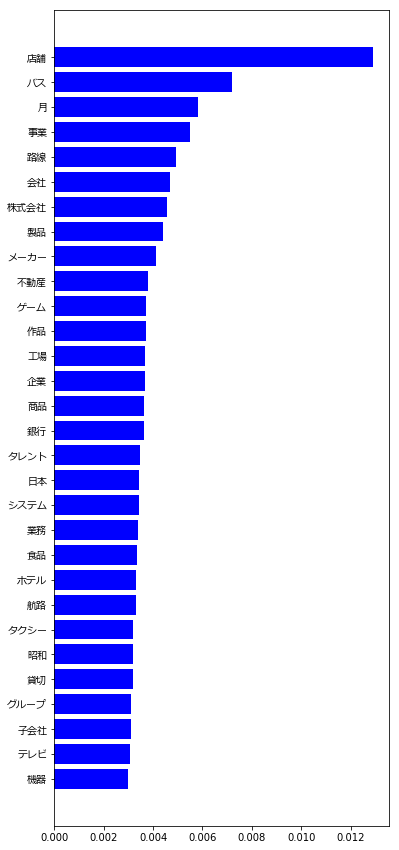

In [60]:
indices_slice = indices[-30::]

plt.figure(figsize=(6,15))
plt.barh(range(len(indices_slice)),importances[indices_slice],color="b",align="center")
plt.yticks(range(len(indices_slice)),features[indices_slice],fontproperties=fp)
plt.show()

In [109]:
X_train["category_od"] = Y_train

C:\Users\tamura\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [119]:
X_train[0].

2941    沿革 昭和 月 *資本金 *本社 所在地 東京 新宿 早稲田南 事業所 拠点 札幌 仙台 東...
1524    設立当初 大阪府 近畿 地方 中心 北海道 沖縄 日本 全国 拠点 イベントデータレコーダー...
349     バブル 郵政省 総務 民放 テレビ 全国 波 形 岩手 民放 月 局 めん 北海道 東北 地...
2208    月 モデル エージェンシー 俳優 タレント マネジメント 内田 有紀 高島 礼子 りょう タ...
8942    創業者 社長 依田 学習塾 会社 前身 設立当初 吹田 豊中 東淀川 府内 拠点 経費 拠点...
2236                             本社 岡山 都窪 早島 本店 広島 福山 南蔵王
6394    上野 耕三 農村 映画 pr 映画 おふくろ バス 文化 映画 酒井田 柿 右 衛門 柿 右...
2559    野菜 ジュース 野菜 飲料 果実 飲料 受託製造 自社ブランド 製品 長野 安曇 野市 松本...
2257    マザー ボード ビデオカードグラフィックカード 主力製品 pc ゲーミング 機器 マウスコン...
3096    東武 東上本線 東武 沿線 地域 不動産 東京 都城 北部 埼玉県 南部 物件 中心 事業 ...
5393    白髪染め ヘア カラー パオン シュワルツコフヘンケル 山発産業 洋画 佐伯 祐三 絵画 名...
4974    財団 法人 エヌケービー 公益 財団 法人 日本 交通 文化 協会 日本 交通 文化 協会 ...
1382    運営会社 株式会社 埼玉 ブロンコス トップ リーグ 日本 プロバスケットボールリーグ bj...
3270    月 リッチ 株式会社 プロミス smbc コンシューマーファイナンス 傘下 月 他社 沿革 ...
5199    昭和 月 店舗 愛知 名古屋 市内 東京 三重 福岡 大阪府 タイ 王国 ホテル 事業 会社...
1537    東芝 グループ 産業 光源 機器 ウェッジベースランプ 世界 シェア 液晶 ライト 冷 陰極...
6132    昭和 韓国 朝鮮 韓国 資本 大韓民国 韓国 韓 銀行 昭和 大阪 支店 平成 月 韓 銀行...
895     テレビ朝日 

In [116]:
X_train["category"] = import_data_pd["category"][X_train.index]

C:\Users\tamura\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [201]:
def get_rate(import_data_pd,search):
    rabel_name = "contain_" + search
    import_data_pd["all"],import_data_pd[rabel_name] = 0,0
    a_df = import_data_pd[import_data_pd["text"].str.contains(search)].groupby("category").count()
    b_df = import_data_pd.groupby("category").count()
    c_df = pd.concat([b_df["all"],a_df[rabel_name]], axis=1)
    c_df["rate"] = [c_df[rabel_name][i]/c_df["all"][i] for i in c_df.index]
    
    return c_df.fillna(0)

In [203]:
get_rate(import_data_pd,"店舗")

,all,contain_店舗,rate
category,,,
50,26,0.0,0.000000
1050,15,0.0,0.000000
2050,224,10.0,0.044643
3050,723,78.0,0.107884
3100,96,10.0,0.104167
3150,24,0.0,0.000000
3200,192,2.0,0.010417
3250,95,3.0,0.031579
3300,30,1.0,0.033333
